In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [4]:
#loading dataset
bikes=pd.read_csv("/content/drive/MyDrive/Datasets/archive (7)/bike_dataset.csv")

In [5]:
bikes.head(10)

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.20,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.60,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.00,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.90,116.0
5,Ola Electric S1 Pro,120149,NaN,181.0,Electric Bike,125,https://www.carandbike.com/ola-electric-bikes/...,2.90,116.0
6,Revolt RV300,114264,NaN,180.0,Electric Bike,101,https://www.carandbike.com/revolt-bikes/rv300,4.00,65.0
7,Okinawa Praise,71990,NaN,170.0,Electric Bike,96,https://www.carandbike.com/okinawa-bikes/praise,9.43,78.0
8,Hero Electric NYX HX,67540,NaN,165.0,Electric Bike,73,https://www.carandbike.com/hero-electric-bikes...,3.30,42.0
9,Crayon Motors Envy,53000,NaN,160.0,Electric Bike,100,https://www.carandbike.com/crayon-motors-bikes...,NaN,25.0


In [7]:
bikes.shape


(361, 9)

In [8]:
bikes.describe

<bound method NDFrame.describe of                       model_name    price      CC  mileage   type_of_bike  \
0          Gravton Motors Quanta    99000     NaN    320.0  Electric Bike   
1              Simple Energy One   109999     NaN    236.0  Electric Bike   
2                  Okaya Classiq    69900     NaN    200.0  Electric Bike   
3             Oben Electric Rorr   102999     NaN    200.0  Electric Bike   
4                Ola Electric S1    85099     NaN    181.0  Electric Bike   
..                           ...      ...     ...      ...            ...   
356                 Aprilia RSV4  2369000  1099.0     12.0    Petrol Bike   
357  Harley-Davidson Sportster S  1551000  1252.0     11.8    Petrol Bike   
358              Suzuki Hayabusa  1640000  1340.0     11.0    Petrol Bike   
359       Ducati Hypermotard 950  1402278   937.0      9.0    Petrol Bike   
360  Harley-Davidson CVO Limited  4999000  1923.0      8.0    Petrol Bike   

     weight_in_kg                        

In [9]:
bikes.info

<bound method DataFrame.info of                       model_name    price      CC  mileage   type_of_bike  \
0          Gravton Motors Quanta    99000     NaN    320.0  Electric Bike   
1              Simple Energy One   109999     NaN    236.0  Electric Bike   
2                  Okaya Classiq    69900     NaN    200.0  Electric Bike   
3             Oben Electric Rorr   102999     NaN    200.0  Electric Bike   
4                Ola Electric S1    85099     NaN    181.0  Electric Bike   
..                           ...      ...     ...      ...            ...   
356                 Aprilia RSV4  2369000  1099.0     12.0    Petrol Bike   
357  Harley-Davidson Sportster S  1551000  1252.0     11.8    Petrol Bike   
358              Suzuki Hayabusa  1640000  1340.0     11.0    Petrol Bike   
359       Ducati Hypermotard 950  1402278   937.0      9.0    Petrol Bike   
360  Harley-Davidson CVO Limited  4999000  1923.0      8.0    Petrol Bike   

     weight_in_kg                          

In [10]:
bikes.drop(columns=['links'],inplace=True,axis=1)

In [11]:
bikes.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,2.9,116.0


In [13]:
bikes['power']=bikes['weight_in_kg']*bikes['acceleration_speed']/76

In [15]:
bikes.tail()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,acceleration_speed,top_speed,power
356,Aprilia RSV4,2369000,1099.0,12.0,Petrol Bike,202,NaN,NaN,NaN
357,Harley-Davidson Sportster S,1551000,1252.0,11.8,Petrol Bike,228,NaN,NaN,NaN
358,Suzuki Hayabusa,1640000,1340.0,11.0,Petrol Bike,266,NaN,NaN,NaN
359,Ducati Hypermotard 950,1402278,937.0,9.0,Petrol Bike,176,NaN,NaN,NaN
360,Harley-Davidson CVO Limited,4999000,1923.0,8.0,Petrol Bike,411,NaN,NaN,NaN


In [35]:
bikes.rename(columns ={'acceleration_speed': 'accelaration'},inplace=True)
bikes.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,accelaration,top_speed,power
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,4.2,70.0,5.526316
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,3.6,100.0,5.210526
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,NaN,25.0,NaN
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,3.0,100.0,4.736842
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,2.9,116.0,4.617105


In [22]:
result = bikes.groupby('type_of_bike')['top_speed'].mean()

In [23]:
result.head()

type_of_bike
Electric Bike     55.157895
Petrol Bike      116.949161
Name: top_speed, dtype: float64

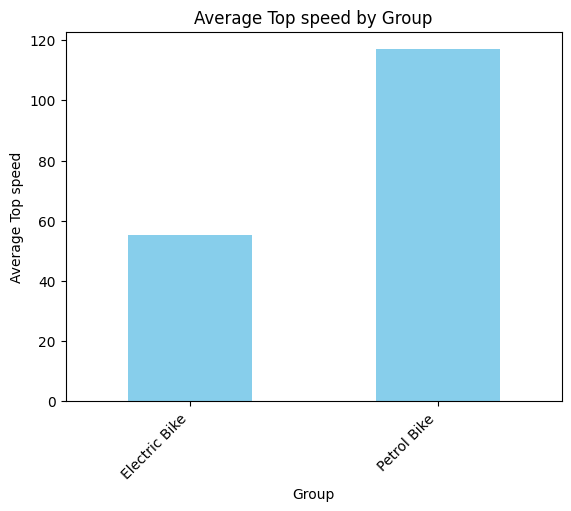

In [32]:
result.plot(kind='bar', color='skyblue')

plt.title('Average Top speed by Group')
plt.xlabel('Group')
plt.ylabel('Average Top speed')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of group names
plt.show()


In [31]:
model = bikes.groupby('model_name')['top_speed'].mean()

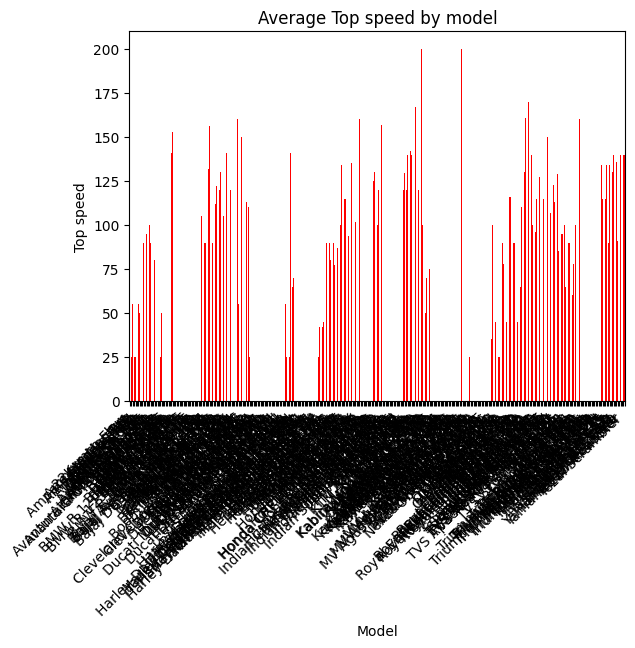

In [34]:
model.plot(kind='bar', color='red')

plt.title('Average Top speed by model')
plt.xlabel('Model')
plt.ylabel('Top speed')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility of group names
plt.show()

In [36]:
acc = bikes.groupby('mileage')['accelaration'].mean()

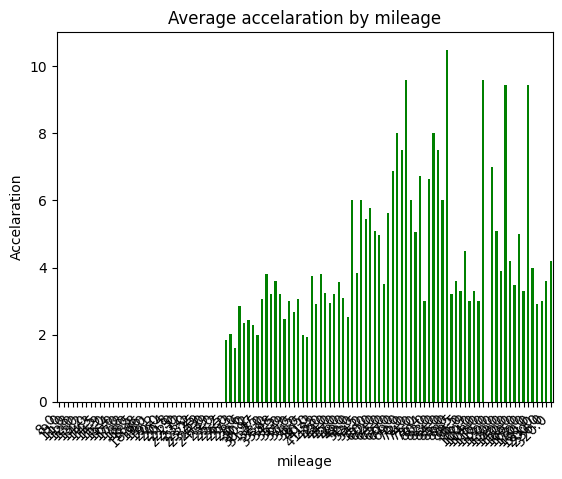

In [38]:
acc.plot(kind='bar', color='green')

plt.title('Average accelaration by mileage')
plt.xlabel('mileage')
plt.ylabel('Accelaration')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
acc.tail(10)

mileage
140.0    4.200000
150.0    3.466667
160.0    5.000000
165.0    3.300000
170.0    9.430000
180.0    4.000000
181.0    2.900000
200.0    3.000000
236.0    3.600000
320.0    4.200000
Name: accelaration, dtype: float64